In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing

In [29]:
df.shape

(150, 6)

In [30]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [31]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [32]:
df = df.drop(columns=['Id'])
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visulaization

<Axes: >

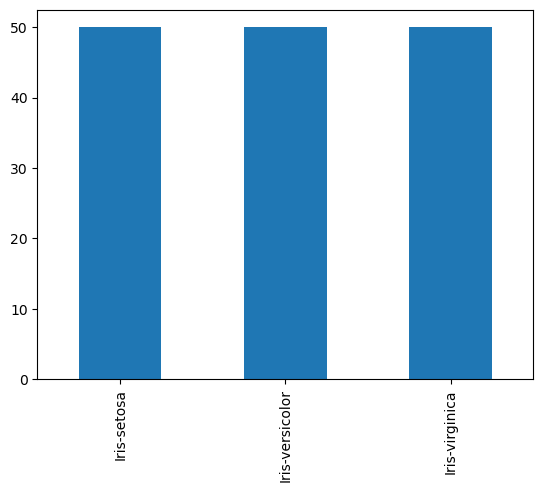

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Species'].value_counts().plot(kind='bar')

<Axes: ylabel='Species'>

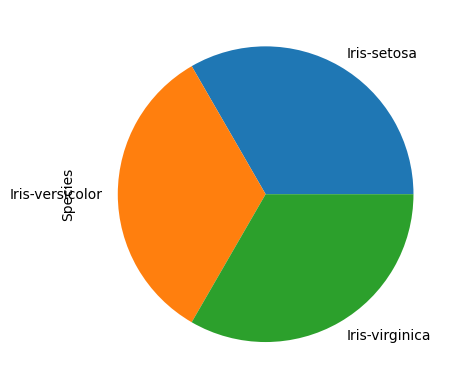

In [39]:
df['Species'].value_counts().plot.pie()

<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

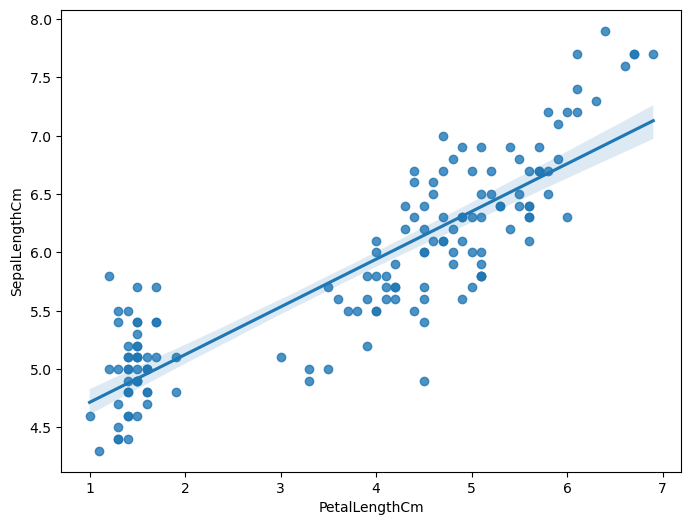

In [40]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalLengthCm',y='SepalLengthCm',data=df)

<Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

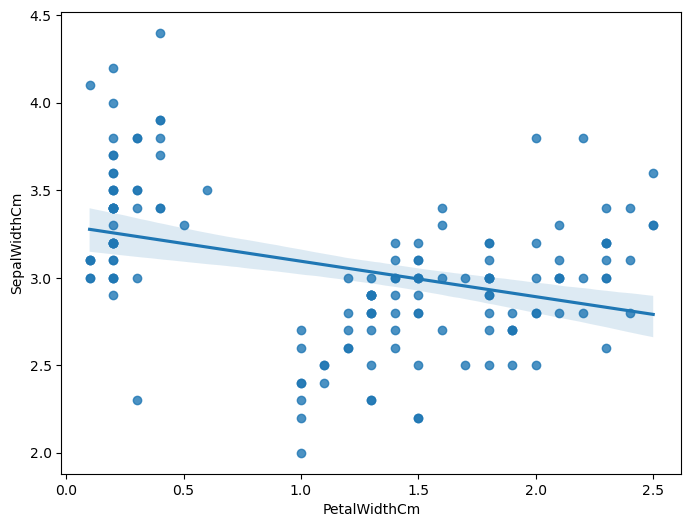

In [41]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalWidthCm',y='SepalWidthCm',data=df)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

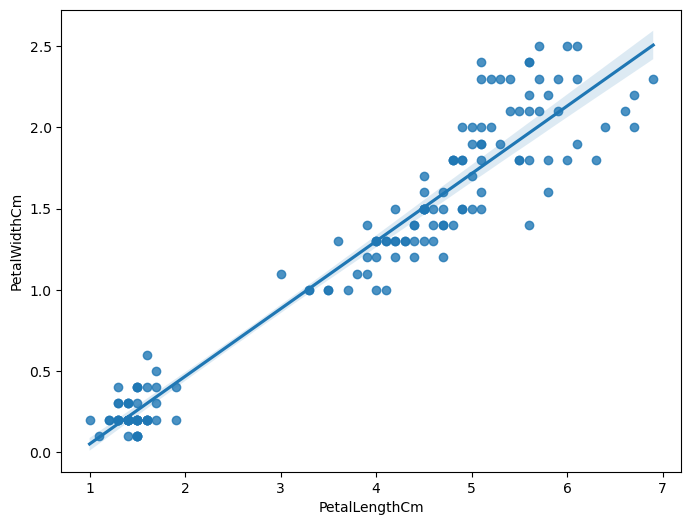

In [42]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalLengthCm',y='PetalWidthCm',data=df)

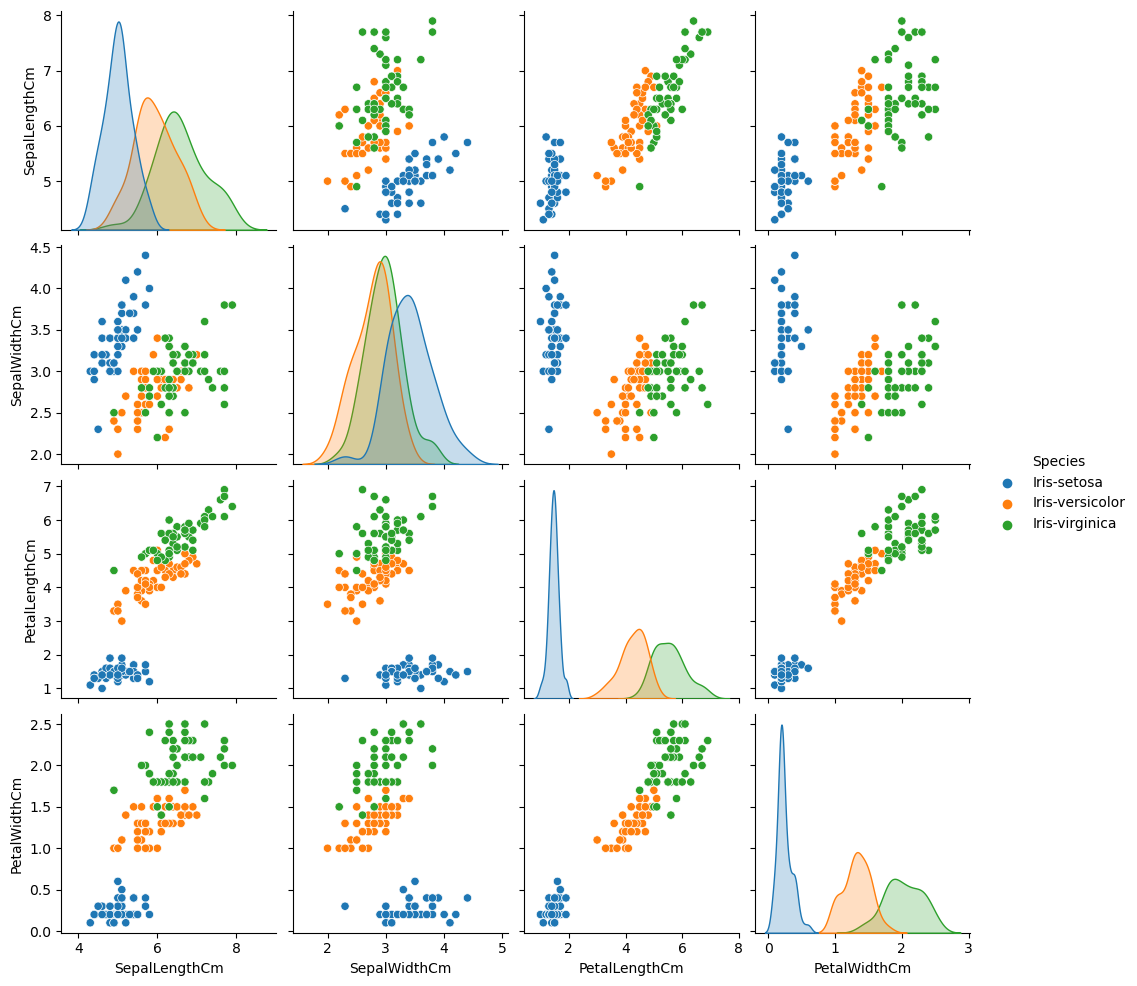

In [43]:
sns.pairplot(data = df , hue = 'Species')

C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_1232\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

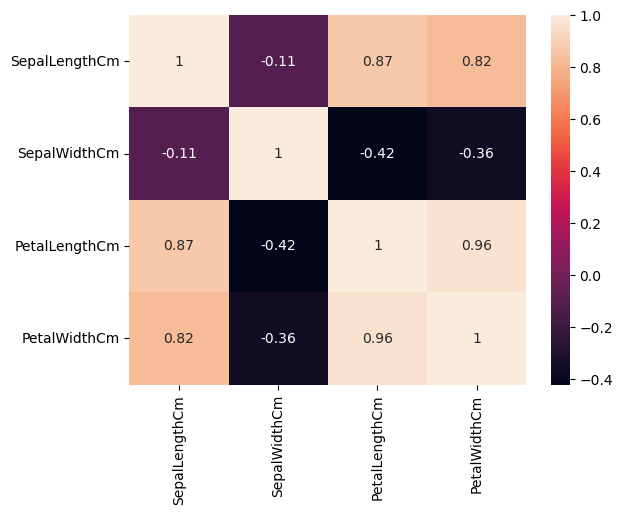

In [45]:
sns.heatmap(df.corr(),annot=True)

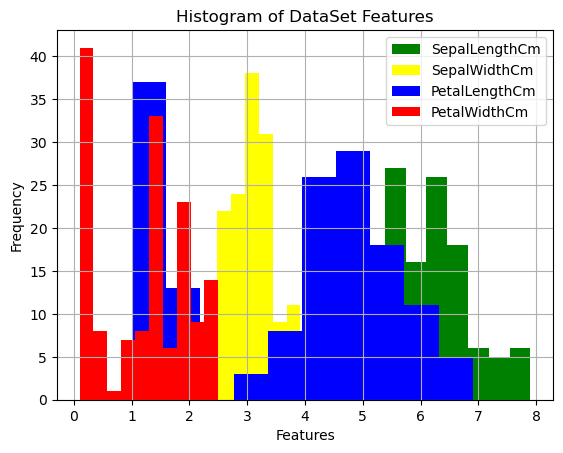

In [46]:
df['SepalLengthCm'].hist(color='green',label='SepalLengthCm')
df['SepalWidthCm'].hist(color='yellow',label='SepalWidthCm')
df['PetalLengthCm'].hist(color='blue',label='PetalLengthCm')
df['PetalWidthCm'].hist(color='red',label='PetalWidthCm')

plt.title('Histogram of DataSet Features')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Encoding Categorical Value

In [50]:
from sklearn.preprocessing import LabelEncoder


encoder=LabelEncoder()
encoder.fit(df['Species'])
df['Species']=encoder.fit_transform(df['Species'])
dictionary=dict(enumerate(encoder.classes_))
print(dictionary)
df.head()

{0: 0, 1: 1, 2: 2}


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Scaling and Splitting of the Data

In [52]:
print('Range of Features before:')
print(df['SepalLengthCm'].max()-df['SepalLengthCm'].min())
print(df['SepalWidthCm'].max()-df['SepalWidthCm'].min())
print(df['PetalLengthCm'].max()-df['PetalLengthCm'].min())
print(df['PetalWidthCm'].max()-df['PetalWidthCm'].min())

Range of Features before:
3.6000000000000005
2.4000000000000004
5.9
2.4


In [54]:
from sklearn.model_selection import train_test_split

X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y=df[['Species']].values.flatten()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=36)
x_train[:5,],y_train[:5]

(array([[5.8, 2.7, 5.1, 1.9],
        [4.9, 3.1, 1.5, 0.1],
        [5.7, 2.8, 4.1, 1.3],
        [6.1, 3. , 4.9, 1.8],
        [6.1, 2.9, 4.7, 1.4]]),
 array([2, 0, 1, 2, 1], dtype=int64))

In [56]:
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train,y_train)
x_test_scale=scaler.fit_transform(x_test,y_test)

x_train_scale[:5,],x_test_scale[:5]

(array([[-0.01333569, -0.75003852,  0.77002924,  0.93677484],
        [-1.15899309,  0.17647965, -1.3255147 , -1.47535656],
        [-0.14063096, -0.51840898,  0.1879337 ,  0.13273104],
        [ 0.3685501 , -0.05514989,  0.65361014,  0.80276754],
        [ 0.3685501 , -0.28677944,  0.53719103,  0.26673834]]),
 array([[ 1.19117647,  0.17783263,  0.53239732,  0.26056861],
        [ 0.86029412, -0.29290081,  0.80280228,  1.39530289],
        [ 0.86029412, -0.05753409,  0.53239732,  0.3866502 ],
        [ 1.96323529, -1.2343677 ,  1.72217914,  1.39530289],
        [ 1.96323529, -0.76363426,  1.61401715,  1.01705813]]))

# Model Training

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

def accuracy_of_model(y_test, y_pred):
    print("Confusion Matrix =>\n{}".format(confusion_matrix(y_test,y_pred)))
    print('Accuracy Score => {}'.format(accuracy_score(y_test, y_pred)))

In [59]:
from sklearn.linear_model import LogisticRegression  #classficiation using LR

logreg=LogisticRegression()
logreg.fit(x_train_scale,y_train)

y_train_pred=logreg.predict(x_train_scale)

print('Model evaluation for training data: ')
accuracy_of_model(y_train,y_train_pred)

y_test_pred=logreg.predict(x_test_scale)

print('\nModel evaluation for test data: ')
accuracy_of_model(y_test,y_test_pred)

Model evaluation for training data: 
Confusion Matrix =>
[[34  0  0]
 [ 0 34  2]
 [ 0  1 34]]
Accuracy Score => 0.9714285714285714

Model evaluation for test data: 
Confusion Matrix =>
[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]
Accuracy Score => 0.9777777777777777


Here we have successfully classified the species of the iris data using Logistic Regression classifier model 
and got a accuracy of over 97% 